# Learn aboout Competition Points

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Formula

This notebook is based on [Kaggle Rankings and Points](https://www.kaggle.com/progression).  
Competition points (previously known as “Kaggle Points”) are awarded based on following formula.  

$$
 \Biggl[\frac{100000}{\sqrt{N_{teammates}}}\Biggl]\Bigl[Rank^{-0.75}\Bigl]\bigl[\log_{10} (1+\log_{10} (N_{teams})) \bigl]\biggl[e^{-t/500}\biggl]
$$

### Rank

$$
 \Bigl[Rank^{-0.75}\Bigl]
$$

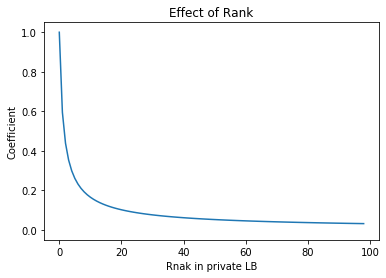

In [2]:
x = np.arange(1, 100)
y = np.power(x, -0.75)
plt.plot(y)
plt.ylim(-0.05,1.05)
plt.title('Effect of Rank')
plt.xlabel('Rnak in private LB')
plt.ylabel('Coefficient');

In [3]:
print('1st :{:.4} '.format(np.power(1, -0.75)))
print('2nd :{:.4} '.format(np.power(2, -0.75)))
print('3rd :{:.4} '.format(np.power(3, -0.75)))
print('10th :{:.4} '.format(np.power(10, -0.75)))
print('50th :{:.4} '.format(np.power(50, -0.75)))
print('100th :{:.4} '.format(np.power(100, -0.75)))

1st :1.0 
2nd :0.5946 
3rd :0.4387 
10th :0.1778 
50th :0.05318 
100th :0.03162 


### Participating teams

$$
 \bigl[\log_{10} (1+\log_{10} (N_{teams})) \bigl]
$$

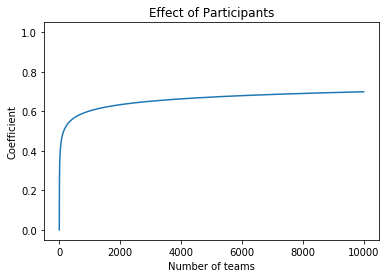

In [4]:
x = np.arange(1, 10000)
y = np.log10(1+np.log10(x))
plt.plot(y)
plt.ylim(-0.05,1.05)
plt.title('Effect of Participants')
plt.xlabel('Number of teams')
plt.ylabel('Coefficient');

In [5]:
print('1000 teams :{:.4} '.format(np.log10(1+np.log10(1000))))
print('10000 teams :{:.4} '.format(np.log10(1+np.log10(10000))))
print('Ratio :{:.4} '.format(np.log10(1+np.log10(10000))/np.log10(1+np.log10(1000))))

1000 teams :0.6021 
10000 teams :0.699 
Ratio :1.161 


### Teammates

$$
 \frac{1}{\sqrt{N_{teammates}}}
$$

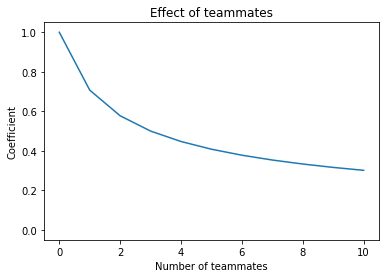

In [6]:
x = np.arange(1, 12)
y = 1/np.sqrt(x)
plt.plot(y)
plt.ylim(-0.05,1.05)
plt.title('Effect of teammates')
plt.xlabel('Number of teammates')
plt.ylabel('Coefficient');

In [7]:
print('1 member  :{:.4} '.format(1/np.sqrt(1)))
print('2 members :{:.4} '.format(1/np.sqrt(2)))
print('3 members :{:.4} '.format(1/np.sqrt(3)))
print('4 members :{:.4} '.format(1/np.sqrt(4)))
print('5 members :{:.4} '.format(1/np.sqrt(5)))
print('8 members :{:.4} '.format(1/np.sqrt(8)))

1 member  :1.0 
2 members :0.7071 
3 members :0.5774 
4 members :0.5 
5 members :0.4472 
8 members :0.3536 


### Days

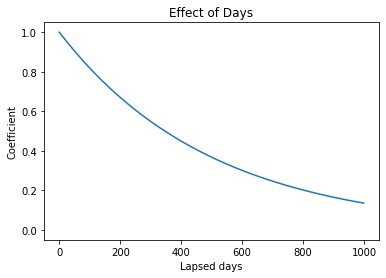

In [8]:
x = np.arange(0, 1000)
y = np.exp(-x/500)
plt.plot(y)
plt.ylim(-0.05,1.05)
plt.title('Effect of Days')
plt.xlabel('Lapsed days')
plt.ylabel('Coefficient');

## Relationship between rank and number of teams

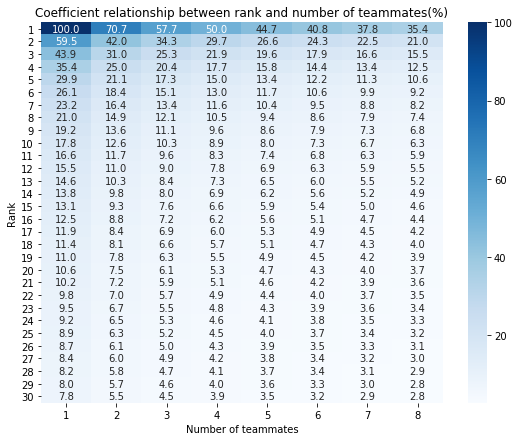

In [9]:
y_list = []
x1_array = np.arange(1, 31)
x2_array = np.arange(1, 9)
for x1 in x1_array:
    for x2 in x2_array:
        y = np.power(x1, -0.75) * (1/np.sqrt(x2)) * 100
        y_list.append(y)
y_array = np.array(y_list).reshape(x1_array.shape[0], x2_array.shape[0])
y_df = pd.DataFrame(y_array)
y_df.index, y_df.columns = x1_array, x2_array
plt.subplots(figsize=(9,7))
sns.heatmap(y_df, cmap='Blues', annot=True,annot_kws={"size": 10}, fmt=".1f")
plt.title('Coefficient relationship between rank and number of teammates(%)')
plt.xlabel('Number of teammates')
plt.ylabel('Rank');

## Simulation

Here is examples.

In [10]:
def calculate_points(teammates, rank, teams, days):
    points = 100000 * 1/np.sqrt(teammates) * np.power(rank, -0.75) * np.log10(1+np.log10(teams)) * np.exp(days/500)
    return points

In [11]:
# My points in Freesound Audio Tagging 2019
teammates = 3
rank = 7
teams = 880
days = 0
points_1 = calculate_points(teammates, rank, teams, days)
points_1

7995.6698588198005

In [12]:
# Solo Gold in 1000teams competition
teammates = 1
rank = 1
teams = 1000
days = 0
points_2 = calculate_points(teammates, rank, teams, days)
points_2

60205.99913279624

You can get over 60,000 points in a single conpetision.
This point is equivalent to the 30th place in the kaggle ranking.

|rank|teams|teammates|medal|points|
|---|---|---|---|---|
|1|1000|1|Gold|60206|
|1|1000|5|Gold|26925|
|5|1000|1|Gold|18006|
|25|1000|1|Silver|5385|
|75|1000|1|Bronze|2362|
|100|1000|1|Bronze|1904|

Thank you for reading! I hope you will find it helpful.